<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller # 5: TF-IDF
`Fecha de entrega: Marzo 25, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances

# Punto 1: Pre-Procesamiento

- `[9 pts]` Leer el archivo `bob_esponja.csv` usando `pandas`
- `[9 pts]` Crear una nueva columna con el texto en minúscula, sin caracteres especiales ni números, sin palabras vacias y hacer stemming de las palabras

### Leer el archivo bob_esponja.csv usando pandas

In [2]:
corpus = pd.read_csv("C:/Users/user/Documents/ESPECIALIZACION/LNP/Archivos/bob_esponja.csv")
corpus

,Personaje,Descripción
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor..."
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e..."
6,Karen Plankton,Karen Plankton es uno de los dos principales a...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ..."
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...


### Crear una nueva columna con el texto en minúscula, sin caracteres especiales ni números, sin palabras vacias y hacer stemming de las palabras

In [3]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    texto = [spanishStemmer.stem(palabra) for palabra in texto]
    texto = " ".join(texto)
    return texto

corpus['Pre_procesado'] = corpus['Descripción'].apply(lambda texto: pre_procesado(texto))
corpus

,Personaje,Descripción,Pre_procesado
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...,bob esponj esponj mar form rectangul color ama...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor...",estrell mar color ros mejor amig bob esponj ju...
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...,calamard tentacul personaj principal bob espon...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...,arenit mejill sandy cheeks ingles personaj pri...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...,don eugeni h cangrej normal llam señor cangrej...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e...",sheldon j plankton simplement plankton dos ant...
6,Karen Plankton,Karen Plankton es uno de los dos principales a...,kar plankton dos principal antagon bob esponj ...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ...",perl perlit cangrej personaj principal bob esp...
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...,señor puff personaj principal bob esponj maest...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...,gary caracol personaj principal bob esponj que...


# Punto 2: TF-IDF

- `[16 pts]` Crear la matriz TF-IDF

## Crear la matriz TF-IDF (Método largo)

In [4]:
corpus.set_index('Personaje', inplace= True) 
corpus.index.name = None

In [5]:
# TF-IDF método Largo

corpus["TP"] = corpus.Pre_procesado.apply(lambda val: len(val.split()))

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow_rep = count_vect.fit_transform(corpus['Pre_procesado'].values)

# Contar # palabras columna pre-procesado

tf = pd.DataFrame(bow_rep.toarray())
tf.columns = count_vect.get_feature_names()
tf.index = corpus.index
tf = tf.T # Transpuesta
tf = tf.div(corpus['TP'], axis=1).round(3)
tf

,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
abaj,0.004,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
aborrec,0.000,0.000,0.008,0.000,0.000,0.0,0.000,0.0,0.000,0.000
acab,0.000,0.000,0.008,0.000,0.000,0.0,0.000,0.0,0.000,0.000
accident,0.004,0.000,0.000,0.000,0.004,0.0,0.000,0.0,0.000,0.000
acept,0.000,0.000,0.000,0.000,0.000,0.0,0.008,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
viv,0.000,0.006,0.008,0.015,0.008,0.0,0.000,0.0,0.000,0.000
vol,0.004,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
voz,0.017,0.000,0.000,0.015,0.000,0.0,0.000,0.0,0.000,0.000
vuelv,0.013,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000


In [6]:
# Cuantos documentos aparecen cada una palabras dividio por cantidad de documentos

df = {}

for palabra in count_vect.get_feature_names():
    suma = corpus['Pre_procesado'].apply(lambda val: palabra in val).sum()
    df[palabra] = suma
df = pd.DataFrame.from_dict(df, orient="index", columns=['doc_count'])

N = corpus.shape[0]

df['df'] = df['doc_count']/N
df

,doc_count,df
abaj,5,0.5
aborrec,1,0.1
acab,1,0.1
accident,2,0.2
acept,1,0.1
...,...,...
viv,4,0.4
vol,1,0.1
voz,2,0.2
vuelv,2,0.2


In [7]:
df['idf'] = 1/df['df']
df['log_idf'] = np.log10(df['idf'])
df

,doc_count,df,idf,log_idf
abaj,5,0.5,2.000000,0.301030
aborrec,1,0.1,10.000000,1.000000
acab,1,0.1,10.000000,1.000000
accident,2,0.2,5.000000,0.698970
acept,1,0.1,10.000000,1.000000
...,...,...,...,...
viv,4,0.4,2.500000,0.397940
vol,1,0.1,10.000000,1.000000
voz,2,0.2,5.000000,0.698970
vuelv,2,0.2,5.000000,0.698970


In [8]:
tfidf = df.join(tf)
tfidf

,doc_count,df,idf,log_idf,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
abaj,5,0.5,2.000000,0.301030,0.004,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
aborrec,1,0.1,10.000000,1.000000,0.000,0.000,0.008,0.000,0.000,0.0,0.000,0.0,0.000,0.000
acab,1,0.1,10.000000,1.000000,0.000,0.000,0.008,0.000,0.000,0.0,0.000,0.0,0.000,0.000
accident,2,0.2,5.000000,0.698970,0.004,0.000,0.000,0.000,0.004,0.0,0.000,0.0,0.000,0.000
acept,1,0.1,10.000000,1.000000,0.000,0.000,0.000,0.000,0.000,0.0,0.008,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
viv,4,0.4,2.500000,0.397940,0.000,0.006,0.008,0.015,0.008,0.0,0.000,0.0,0.000,0.000
vol,1,0.1,10.000000,1.000000,0.004,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
voz,2,0.2,5.000000,0.698970,0.017,0.000,0.000,0.015,0.000,0.0,0.000,0.0,0.000,0.000
vuelv,2,0.2,5.000000,0.698970,0.013,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000


In [9]:
tfidf['Bob Esponja Pantalones Cuadrados'] = tfidf['Bob Esponja Pantalones Cuadrados'] * tfidf['log_idf']
tfidf['Patricio Estrella'] = tfidf['Patricio Estrella'] * tfidf['log_idf']
tfidf['Calamardo Tentáculos'] = tfidf['Calamardo Tentáculos'] * tfidf['log_idf']
tfidf['Arenita Mejillas'] = tfidf['Arenita Mejillas'] * tfidf['log_idf']
tfidf['Eugenio H. Cangrejo'] = tfidf['Eugenio H. Cangrejo'] * tfidf['log_idf']
tfidf['Sheldon J. Plankton'] = tfidf['Sheldon J. Plankton'] * tfidf['log_idf']
tfidf['Karen Plankton'] = tfidf['Karen Plankton'] * tfidf['log_idf']
tfidf['Perlita Cangrejo'] = tfidf['Perlita Cangrejo'] * tfidf['log_idf']
tfidf['Sra. Puff'] = tfidf['Sra. Puff'] * tfidf['log_idf']
tfidf['Gary el Caracol'] = tfidf['Gary el Caracol'] * tfidf['log_idf']
tfidf[['Bob Esponja Pantalones Cuadrados', 'Patricio Estrella', 'Calamardo Tentáculos','Arenita Mejillas', 'Eugenio H. Cangrejo', 'Sheldon J. Plankton', 'Karen Plankton', 'Perlita Cangrejo', 'Sra. Puff', 'Gary el Caracol']]

,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
abaj,0.001204,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.000000
aborrec,0.000000,0.000000,0.008000,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.000000
acab,0.000000,0.000000,0.008000,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.000000
accident,0.002796,0.000000,0.000000,0.000000,0.002796,0.0,0.000,0.0,0.000000,0.000000
acept,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.008,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
viv,0.000000,0.002388,0.003184,0.005969,0.003184,0.0,0.000,0.0,0.000000,0.000000
vol,0.004000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.000000
voz,0.011882,0.000000,0.000000,0.010485,0.000000,0.0,0.000,0.0,0.000000,0.000000
vuelv,0.009087,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.000000


## Crear la matriz TF-IDF (Método corto)

In [13]:
# TF-DF con Método Corto

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(corpus['Pre_procesado'].values)

tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())
tfidf_matrix.index = corpus.index

tfidf_matrix=tfidf_matrix.T.round(3)
tfidf_matrix

,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
abaj,0.057,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
aborrec,0.000,0.00,0.091,0.000,0.000,0.0,0.000,0.0,0.000,0.000
acab,0.000,0.00,0.091,0.000,0.000,0.0,0.000,0.0,0.000,0.000
accident,0.049,0.00,0.000,0.000,0.045,0.0,0.000,0.0,0.000,0.000
acept,0.000,0.00,0.000,0.000,0.000,0.0,0.064,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
viv,0.000,0.05,0.060,0.108,0.070,0.0,0.000,0.0,0.000,0.000
vol,0.057,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
voz,0.195,0.00,0.000,0.139,0.000,0.0,0.000,0.0,0.000,0.000
vuelv,0.172,0.00,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000


# Punto 3: Distancia del coseno
- `[12 pts]` Calcular la distancia del coseno entre cada una de los personajes
- `[2 pts]` ¿Cuáles son los personajes más parecidos?
- `[2 pts]` ¿Cuáles son los personajes más diferentes?

## Calcular la distancia del coseno entre cada una de los personajes

In [14]:
dist_cos = cosine_distances(tfidf_matrix.T.values)
dist_cos = pd.DataFrame(dist_cos, columns = tfidf_matrix.columns, index = tfidf_matrix.columns)
dist_cos

,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
Bob Esponja Pantalones Cuadrados,0.000000,0.826052,0.918644,0.838317,0.868204,0.872076,0.938609,0.885810,0.858077,0.924158
Patricio Estrella,0.826052,0.000000,0.790530,0.841122,0.831634,0.966449,0.930045,0.891502,0.952583,0.894790
Calamardo Tentáculos,0.918644,0.790530,0.000000,0.919857,0.831344,0.917606,0.949913,0.967265,0.968111,0.851644
Arenita Mejillas,0.838317,0.841122,0.919857,0.000000,0.908202,0.967774,0.948323,0.962015,0.972120,0.900641
Eugenio H. Cangrejo,0.868204,0.831634,0.831344,0.908202,0.000000,0.687380,0.891897,0.796723,0.896080,0.920664
Sheldon J. Plankton,0.872076,0.966449,0.917606,0.967774,0.687380,0.000000,0.794981,0.922577,0.986733,0.969239
Karen Plankton,0.938609,0.930045,0.949913,0.948323,0.891897,0.794981,0.000000,0.966088,0.984919,0.965252
Perlita Cangrejo,0.885810,0.891502,0.967265,0.962015,0.796723,0.922577,0.966088,0.000000,0.873832,0.969504
Sra. Puff,0.858077,0.952583,0.968111,0.972120,0.896080,0.986733,0.984919,0.873832,0.000000,0.964177
Gary el Caracol,0.924158,0.894790,0.851644,0.900641,0.920664,0.969239,0.965252,0.969504,0.964177,0.000000


## ¿Cuáles son los personajes más parecidos?

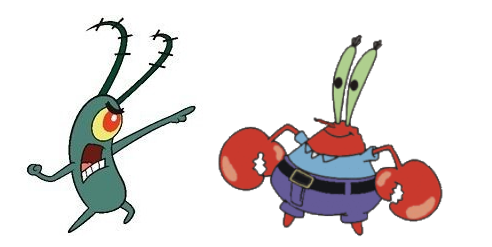

### Sheldon J. Plankton y Eugenio H. Cangrejo son los personajes más parecidos, ya que tienen una distancia de: 0.687380

**Nota: Profe, no pude quitar los 0, para hacer el ranking... :-(**

## ¿Cuáles son los personajes más diferentes?

In [132]:
maxs= dist_cos.max(skipna=True)
maxs

Bob Esponja Pantalones Cuadrados    0.938609
Patricio Estrella                   0.966449
Calamardo Tentáculos                0.968111
Arenita Mejillas                    0.972120
Eugenio H. Cangrejo                 0.920664
Sheldon J. Plankton                 0.986733
Karen Plankton                      0.984919
Perlita Cangrejo                    0.969504
Sra. Puff                           0.986733
Gary el Caracol                     0.969504
dtype: float64

In [82]:
maxs.rank(method = "max")

Bob Esponja Pantalones Cuadrados     2.0
Patricio Estrella                    3.0
Calamardo Tentáculos                 4.0
Arenita Mejillas                     7.0
Eugenio H. Cangrejo                  1.0
Sheldon J. Plankton                 10.0
Karen Plankton                       8.0
Perlita Cangrejo                     6.0
Sra. Puff                           10.0
Gary el Caracol                      6.0
dtype: float64

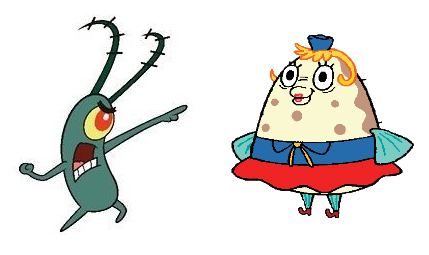

### Sheldon J. Plankton y Sra. Puff son los personajes más diferentes, ya que tienen una distancia de: 0.986733